In [1]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('MNIST.csv')
data = np.array(data)
np.random.shuffle(data)

In [3]:
m, n = data.shape

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

_, m_train = X_train.shape

In [4]:
data_train.shape

(785, 41000)

In [5]:
def init_params(input, hidden_1, hidden_2, output, bias = 1):
    W1 = np.random.rand(hidden_1, input) - 0.5
    b1 = np.random.rand(hidden_1, bias) - 0.5

    W2 = np.random.rand(hidden_2, hidden_1) - 0.5
    b2 = np.random.rand(hidden_2, bias) - 0.5

    W3 = np.random.rand(output, hidden_2) - 0.5
    b3 = np.random.rand(output, bias) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_prime(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# def sig(Z):
#     A = 1 / (1 + sum(np.exp(-Z)))
#     return A

# def sig_prime(Z):
#     A = sig(Z) * (1 - sig(Z))
#     return A

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)

    Z3 = W3.dot(A2)
    A3 = softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)

    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis = 1).reshape(-1, 1)

    dZ2 = W3.T.dot(dZ3) * ReLU_prime(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis = 1).reshape(-1, 1)

    dZ1 = W2.T.dot(dZ2) * ReLU_prime(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis = 1).reshape(-1, 1)
    
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1

    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3

    return W1, b1, W2, b2, W3, b3


In [6]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    return round((np.sum(predictions == Y) / Y.size) * 100, 2)

def train_gd(X, Y, epochs, alpha):
    W1, b1, W2, b2, W3, b3 = init_params(784, 100, 25, 10) #ONLY CHANGE HIDDEN LAYERS!!!!

    for e in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

        if e % 10 == 0:
            print("Epoch:", e)
            print("Accuracy:", get_accuracy(get_predictions(A3), Y), "%")

    return W1, b1, W2, b2, W3, b3

def continue_training(X, Y, epochs, alpha, W1, b1, W2, b2, W3, b3):

    for e in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

        if e % 10 == 0:
            print("Epoch:", e)
            print("Accuracy:", get_accuracy(get_predictions(A3), Y), "%")

    return W1, b1, W2, b2, W3, b3

In [7]:
W1, b1, W2, b2, W3, b3 = train_gd(X_train, Y_train, 1000, 0.05)

Epoch: 0
Accuracy: 10.37 %
Epoch: 10
Accuracy: 32.84 %
Epoch: 20
Accuracy: 42.35 %
Epoch: 30
Accuracy: 48.9 %
Epoch: 40
Accuracy: 53.84 %
Epoch: 50
Accuracy: 58.09 %
Epoch: 60
Accuracy: 61.48 %
Epoch: 70
Accuracy: 64.21 %
Epoch: 80
Accuracy: 66.34 %
Epoch: 90
Accuracy: 68.28 %
Epoch: 100
Accuracy: 69.95 %
Epoch: 110
Accuracy: 71.41 %
Epoch: 120
Accuracy: 72.69 %
Epoch: 130
Accuracy: 73.72 %
Epoch: 140
Accuracy: 74.73 %
Epoch: 150
Accuracy: 75.66 %
Epoch: 160
Accuracy: 76.43 %
Epoch: 170
Accuracy: 77.13 %
Epoch: 180
Accuracy: 77.84 %
Epoch: 190
Accuracy: 78.41 %
Epoch: 200
Accuracy: 78.97 %
Epoch: 210
Accuracy: 79.5 %
Epoch: 220
Accuracy: 79.99 %
Epoch: 230
Accuracy: 80.47 %
Epoch: 240
Accuracy: 80.94 %
Epoch: 250
Accuracy: 81.33 %
Epoch: 260
Accuracy: 81.66 %
Epoch: 270
Accuracy: 81.93 %
Epoch: 280
Accuracy: 82.21 %
Epoch: 290
Accuracy: 82.48 %
Epoch: 300
Accuracy: 82.74 %
Epoch: 310
Accuracy: 83.01 %
Epoch: 320
Accuracy: 83.25 %
Epoch: 330
Accuracy: 83.5 %
Epoch: 340
Accuracy: 83.76 %

In [8]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_results(idx, W1, b1, W2, b2, W3, b3):
    curr_img = X_train[:, idx, None]
    prediction = make_predictions(X_train[:, idx, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[idx]

    print('Prediction:', prediction)
    print('actual:', label)

    curr_img = curr_img.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(curr_img)
    plt.show()

Prediction: [1]
actual: 1


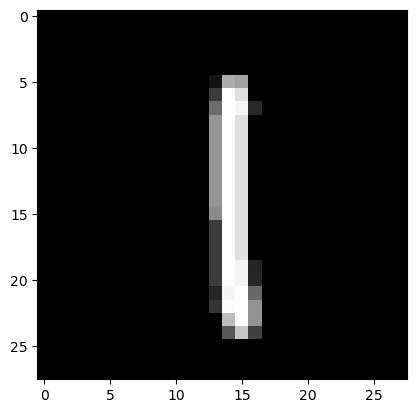

Prediction: [2]
actual: 2


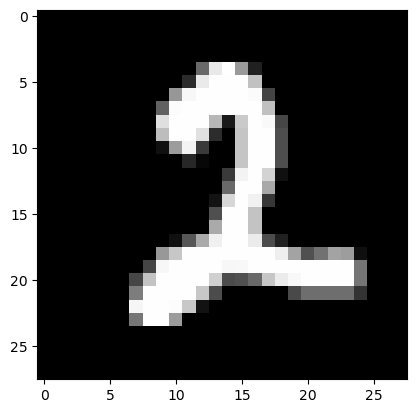

In [9]:
test_results(np.random.randint(0, Y_train.size), W1, b1, W2, b2, W3, b3)
test_results(np.random.randint(0, Y_train.size), W1, b1, W2, b2, W3, b3)


In [10]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
get_accuracy(test_predictions, Y_test)

89.9

In [14]:
W1, b1, W2, b2, W3, b3 = continue_training(X_train, Y_train, 1000, 0.005, W1, b1, W2, b2, W3, b3)

Epoch: 0
Accuracy: 89.83 %
Epoch: 10
Accuracy: 89.83 %
Epoch: 20
Accuracy: 89.84 %
Epoch: 30
Accuracy: 89.84 %
Epoch: 40
Accuracy: 89.84 %
Epoch: 50
Accuracy: 89.84 %
Epoch: 60
Accuracy: 89.85 %
Epoch: 70
Accuracy: 89.85 %
Epoch: 80
Accuracy: 89.85 %
Epoch: 90
Accuracy: 89.85 %
Epoch: 100
Accuracy: 89.85 %
Epoch: 110
Accuracy: 89.86 %
Epoch: 120
Accuracy: 89.86 %
Epoch: 130
Accuracy: 89.87 %
Epoch: 140
Accuracy: 89.87 %
Epoch: 150
Accuracy: 89.88 %
Epoch: 160
Accuracy: 89.88 %
Epoch: 170
Accuracy: 89.89 %
Epoch: 180
Accuracy: 89.9 %
Epoch: 190
Accuracy: 89.9 %
Epoch: 200
Accuracy: 89.9 %
Epoch: 210
Accuracy: 89.91 %
Epoch: 220
Accuracy: 89.91 %
Epoch: 230
Accuracy: 89.91 %
Epoch: 240
Accuracy: 89.91 %
Epoch: 250
Accuracy: 89.93 %
Epoch: 260
Accuracy: 89.93 %
Epoch: 270
Accuracy: 89.93 %
Epoch: 280
Accuracy: 89.94 %
Epoch: 290
Accuracy: 89.95 %
Epoch: 300
Accuracy: 89.95 %
Epoch: 310
Accuracy: 89.95 %
Epoch: 320
Accuracy: 89.96 %
Epoch: 330
Accuracy: 89.96 %
Epoch: 340
Accuracy: 89.96 %

In [15]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
get_accuracy(test_predictions, Y_test)

90.8